## Import Packages to use in machine learning ## 

In [1]:
# import premade functions
import MSE_ML_functions

# import general python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

# import machine learning packages
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn import preprocessing

## Read in data we want to do machine learning on ##

In [2]:
# we can read in the excel sheet using the pandas package
df = pd.read_excel(r'band_gap_nonmetal.xlsx')
df.head()

,composition,Eg (eV)
0,Hg0.7Cd0.3Te,0.350
1,CuBr,3.077
2,LuP,1.300
3,Cu3SbSe4,0.400
4,ZnO,3.436


## Convert the chemical formula into feature vector ##

In [3]:
# make an object to hold elemetal properties and functions to get features
gf = MSE_ML_functions.Vectorize_Formula()

# get an example feature vector
feature_example = gf.get_features('NaCl')

# print vector values and how we made them
for feature, name in zip(feature_example, gf.column_names):
    print(name + ':', feature)

avg_1st_ionization_potential_(kJ/mol): 873.5
avg_Allred-Rockow_electronegativity: 1.87
avg_Atomic_Concentration(1e-23_cm-3): nan
avg_Atomic_Number: 14.0
avg_Atomic_Radus: 1.345
avg_Atomic_Weight: 29.22
avg_B(Gpa): 3.95
avg_Boiling_Point_(K): 697.35
avg_Cohesive_energy: 1.255
avg_Covalent_Radius: 1.2650000000000001
avg_Critical_Temperature: 1494.98
avg_Density_(g/mL): 0.485
avg_G: nan
avg_Gordy_electonegativity: 4.6899999999999995
avg_High_Temp_Debye(K): nan
avg_Low_Temp_Debye(K): nan
avg_MB_electonegativity: 1.935
avg_Melting_point_(K): 271.55
avg_Mendele_Number: 48.0
avg_Miracle_Radius_[pm]: nan
avg_Molar_Denstiy_(mol/ml): 0.02
avg_Molar_Heat_Capacity(J/mol_K): 22.65
avg_Mulliken_EN: 5.575
avg_Nagle_electonegativity: 1.8849999999999998
avg_Nearest_Neighbor_Distance(pm): 284.0
avg_Number_of_unfilled_d_valence_electrons: 10.0
avg_Number_of_unfilled_f_valence_electrons: 14.0
avg_Number_of_unfilled_p_valence_electrons: 3.5
avg_Number_of_unfilled_s_valence_electrons: 0.5
avg_Orbital_Radius

In [4]:
# make empty list where we will store the feature vectors
features = []
# make empty list where we will store the property value
targets = []

# add the values to the list using a for loop
for formula, target in zip(df['composition'], df['Eg (eV)']):
    features.append(gf.get_features(formula))
    targets.append(target)

# split feature vectors and targets as X and y
X = pd.DataFrame(features, columns = gf.column_names)
y = pd.Series(targets)

# show what the feature vectors look like. Each row is a new formula.
X.head()

The element: G0+ from formula GaAs0.1P0.9G1128 is not currently supported in our database


,avg_1st_ionization_potential_(kJ/mol),avg_Allred-Rockow_electronegativity,avg_Atomic_Concentration(1e-23_cm-3),avg_Atomic_Number,avg_Atomic_Radus,avg_Atomic_Weight,avg_B(Gpa),avg_Boiling_Point_(K),avg_Cohesive_energy,avg_Covalent_Radius,...,range_nws(e/au3),range_outer_shell_electrons,range_polarizability(A^3),range_specific_heat_(J/g_K)_,range_thermal_conductivity_(W/(m_K))_,range_valence_d,range_valence_f,range_valence_p,range_valence_s,range_volume(10-6m3)
0,917.150,1.92400,3.6570,61.20,1.455,150.86800,53.5200,1007.750,1.5035,1.4185,...,0.00,0.0,1.80,0.091,94.45,0.0,14.0,4.0,0.0,1.08
1,942.500,2.27000,5.4050,32.00,1.195,71.72500,69.9500,1586.050,2.3550,1.2600,...,0.00,6.0,3.60,0.090,400.88,10.0,0.0,5.0,1.0,0.00
2,768.000,1.67000,NaN,43.00,1.575,102.96850,39.0000,2114.150,3.9300,1.3300,...,2.58,3.0,18.30,0.620,16.16,1.0,14.0,3.0,0.0,9.17
3,854.125,2.15625,5.4175,34.25,1.225,78.53125,60.6875,1822.025,2.8825,1.2700,...,1.18,5.0,2.90,0.170,400.48,10.0,0.0,4.0,1.0,9.83
4,1110.000,2.60000,NaN,19.00,0.950,40.69500,35.8250,634.650,1.9850,1.0200,...,0.00,4.0,5.61,0.530,115.97,10.0,0.0,4.0,0.0,0.00


In [5]:
y.head()

0    0.350
1    3.077
2    1.300
3    0.400
4    3.436
dtype: float64

## Process formula based feature vector remove rows containing elements for which we don't have data ##

In [6]:
# drop elements that aren't included in the elmenetal properties list. These
# will be returned as feature rows completely full of Nan values.
X.dropna(inplace=True, how='all')
y = y.loc[X.index]

# reset dataframe indices to simplify code later.
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

## Missing values can be created when certain elemental properties are missing. These need to be replaced before the ML process. They are filled with the mean values for each column

In [7]:
# get the column names
cols = X.columns.values
# find the mean value of each column
mean_values = X[cols].mean()
# fill the missing values in each column with the columns mean value
X[cols]=X[cols].fillna(mean_values.iloc[0])

# show that the missing values are filled
X.head()

,avg_1st_ionization_potential_(kJ/mol),avg_Allred-Rockow_electronegativity,avg_Atomic_Concentration(1e-23_cm-3),avg_Atomic_Number,avg_Atomic_Radus,avg_Atomic_Weight,avg_B(Gpa),avg_Boiling_Point_(K),avg_Cohesive_energy,avg_Covalent_Radius,...,range_nws(e/au3),range_outer_shell_electrons,range_polarizability(A^3),range_specific_heat_(J/g_K)_,range_thermal_conductivity_(W/(m_K))_,range_valence_d,range_valence_f,range_valence_p,range_valence_s,range_volume(10-6m3)
0,917.150,1.92400,3.657000,61.20,1.455,150.86800,53.5200,1007.750,1.5035,1.4185,...,0.00,0.0,1.80,0.091,94.45,0.0,14.0,4.0,0.0,1.08
1,942.500,2.27000,5.405000,32.00,1.195,71.72500,69.9500,1586.050,2.3550,1.2600,...,0.00,6.0,3.60,0.090,400.88,10.0,0.0,5.0,1.0,0.00
2,768.000,1.67000,876.793225,43.00,1.575,102.96850,39.0000,2114.150,3.9300,1.3300,...,2.58,3.0,18.30,0.620,16.16,1.0,14.0,3.0,0.0,9.17
3,854.125,2.15625,5.417500,34.25,1.225,78.53125,60.6875,1822.025,2.8825,1.2700,...,1.18,5.0,2.90,0.170,400.48,10.0,0.0,4.0,1.0,9.83
4,1110.000,2.60000,876.793225,19.00,0.950,40.69500,35.8250,634.650,1.9850,1.0200,...,0.00,4.0,5.61,0.530,115.97,10.0,0.0,4.0,0.0,0.00


## Break the data up into training and test sets. This lets us verify how well the model does on data that wasn't used in training

In [8]:
# Here we randomly split our data to get training and test sets. The test set will consist of 1/4 the data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=1)

In [22]:
print(len(X_train))
print(len(X_test))

2921
974


## The training data can be used to create a machine learning model. We will try random forest regression, a simply and effective technique.

In [9]:
# we create a random forest object. This will be trained and 
# used to predict future results. 
rf = RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=1)

# fit the model to the data. Also called training the model
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

## Now that the model has been created, we can test it on the data we withheld during training

In [10]:
# score the model using predictions based on the testing set
y_predict = rf.predict(X_test)

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
print("mse: %f, rmse: %f" % (mse, rmse))
print('score:', rf.score(X_test, y_test))

mse: 0.194419, rmse: 0.440930
score: 0.9177829594776613


##  A simple plot allows us to quickly evaluate the performance

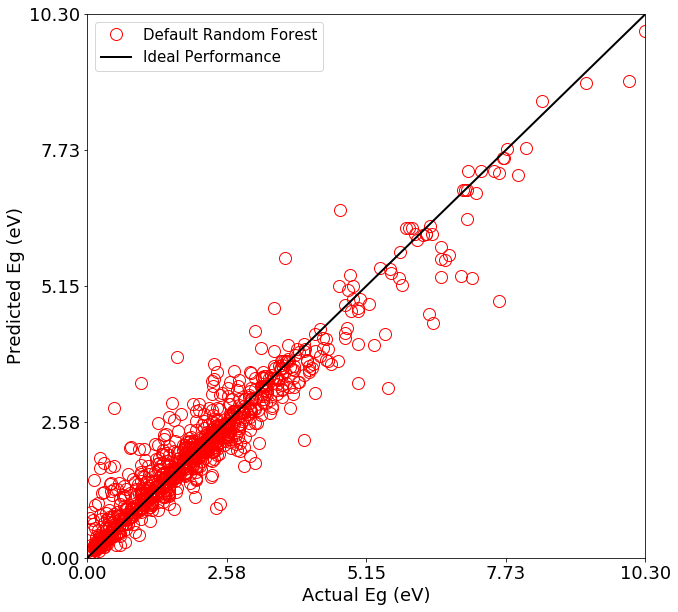

In [11]:
plt.figure(1, figsize=(10, 10))
font = {'family': 'DejaVu Sans',
        'weight': 'normal',
        'size': 18}
plt.rc('font', **font)

plt.plot(y_test, y_predict, 'ro', markersize=12, mfc='none')
plt.plot([0,1000],[0,1000], 'k', linewidth=2)
plt.xlabel('Actual Eg (eV)')
plt.ylabel('Predicted Eg (eV)')
plt.xlim((0, max(y_test)))
plt.ylim((0, max(y_test)))
ticks = np.linspace(0, max(y_test), 5)
plt.xticks(ticks)
plt.yticks(ticks)
plt.legend(['Default Random Forest','Ideal Performance'], loc='best', fontsize=15)


## Another thing we can do is display the most important features used in the model. Important features are the features that most succesfully homoginize a group of data

## For this model, we can calculate the feature importance using a function found in the import "MSE_ML_functions"

Feature ranking:
1. feature 45 (0.327) : avg_metallic_valence
2. feature 11 (0.132) : avg_Density_(g/mL)
3. feature 130 (0.024) : var_MB_electonegativity
4. feature 182 (0.022) : range_Density_(g/mL)
5. feature 137 (0.017) : var_Nagle_electonegativity
6. feature 187 (0.016) : range_MB_electonegativity
7. feature 141 (0.014) : var_Number_of_unfilled_p_valence_electrons
8. feature 168 (0.013) : var_valence_p
9. feature 25 (0.013) : avg_Number_of_unfilled_d_valence_electrons
10. feature 68 (0.012) : sum_Density_(g/mL)


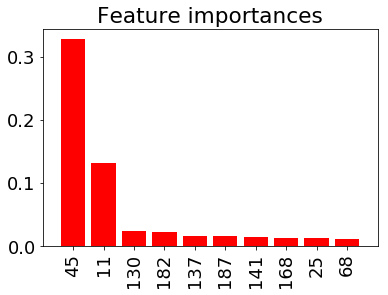

In [12]:
# we can get feature importances from a model by passing the model and the training featres into the function below 
MSE_ML_functions.rf_feature_importance(rf, X_train, N=10)

## Now that we have tested the performance of random foreset, lets try an support vector machine.

## Before training the model, we will need to implement feature scaling and normalizatoin. 

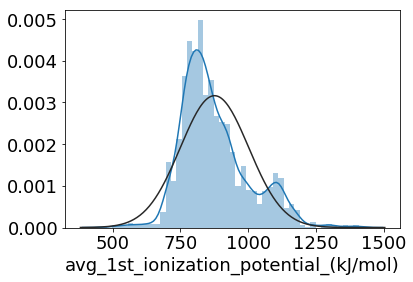

In [13]:
# data distribution for the first column before scaling
sns.distplot(X_train.iloc[:, 0], fit=norm)

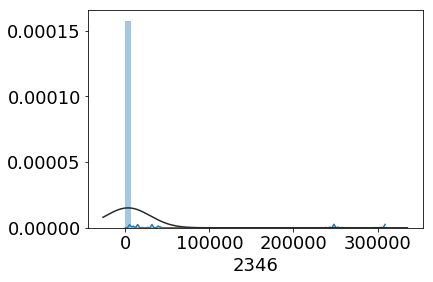

In [14]:
# data distribution for the first row in the training set before normalizing
sns.distplot(X_train.iloc[0], fit=norm)

In [15]:
# scales each column of data to have a mean of 0 and a variance of 1
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# normalizes each row in the data
normalizer = preprocessing.Normalizer().fit(X_train)

X_train_processed = pd.DataFrame(normalizer.transform(X_train_scaled))
X_test_processed = pd.DataFrame(normalizer.transform(X_test_scaled))

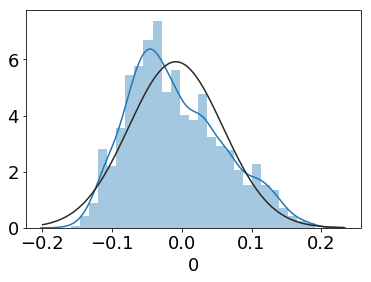

In [16]:
# data distribution for the column after scaling
sns.distplot(X_train_processed.iloc[:, 0], fit=norm)

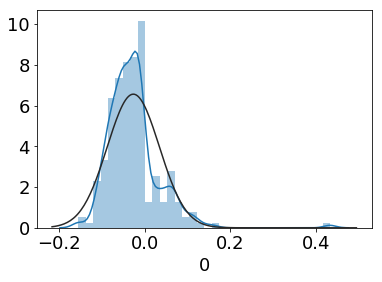

In [17]:
# datadistribution for row after normalizing
sns.distplot(X_train_processed.iloc[0], fit=norm)

## Now that we have scaled the features columns and normalized the feature vectors, we can make a prediction with an SVM.

In [18]:
# create defaul support vector object 
svr = SVR()

# train the a model based on support vector regression
svr.fit(X_train_processed, y_train)

# predict the withheld data
y_predict = svr.predict(X_test_processed)

# get performance metrics
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
print("mse: %f, rmse: %f" % (mse, rmse))
print(svr.score(X_test_processed, y_test))


mse: 1.316602, rmse: 1.147433
0.44322888398138494


In [19]:
# print the default values for svr
svr

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## The default SVM doesn't perform well. We can try to improve performance by implementing a grid search. This is a way of optimizing parameters that we think could be important.

In [20]:
# choose paramters from grid search
param_grid = {'C': [1, 10, 100], 'gamma': [0.1, 1, 10]}

# set up grid and fit with training data
grid = model_selection.GridSearchCV(SVR(), param_grid=param_grid, cv=5)
grid.fit(X_train_processed, y_train)

# get prediction from best model built in grid search
svm_y_predict = grid.predict(X_test_processed)

# print the optimal parameters from search space
print(grid.best_params_)

# get performance metrics
mse = mean_squared_error(y_test, svm_y_predict)
rmse = np.sqrt(mse)
print("mse: %f, rmse: %f" % (mse, rmse))
print(grid.score(X_test_processed, y_test))

{'C': 10, 'gamma': 1}
mse: 0.211656, rmse: 0.460060
0.9104940668538796


## We can see there is a large improvement the model. These results are satisfactory, matching close to those of the random forest predictions. If we aren't content with this performance, we can try changing the kernal space, or reducing the number of features we are using. 